Data:
https://www.kaggle.com/uciml/pima-indians-diabetes-database

Load the dataset<p>
Perform exploratory data analysis


1. Target variable distribution
2. Examine missing values
3. Examine data types
4. Examine data distribution
5. Examine data intercorrelations


<p>
5 pts.



In [11]:
from google.colab import files
uploaded =files.upload()

listings = pd.read_csv(io.BytesIO(uploaded['diabetes.csv']))

Saving diabetes.csv to diabetes.csv


In [12]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import math

# Load the dataset from 'diabetes.csv'
data = pd.read_csv('diabetes.csv') # Uncomment this line to load the data

# Assuming 'data' is the dataset from 'diabetes.csv'
# Perform exploratory data analysis
# 1. Target variable distribution
target_distribution = data['Outcome'].value_counts()  # 'data' contains the loaded dataset

# 2. Examine missing values
missing_values = data.isnull().sum()

# 3. Examine data types
data_types = data.dtypes

# 4. Examine data distribution (summary statistics)
data_distribution = data.describe()

# 5. Examine data intercorrelations (correlation matrix)
correlation_matrix = data.corr()

target_distribution, missing_values, data_types, data_distribution, correlation_matrix

(Outcome
 0    500
 1    268
 Name: count, dtype: int64,
 Pregnancies                 0
 Glucose                     0
 BloodPressure               0
 SkinThickness               0
 Insulin                     0
 BMI                         0
 DiabetesPedigreeFunction    0
 Age                         0
 Outcome                     0
 dtype: int64,
 Pregnancies                   int64
 Glucose                       int64
 BloodPressure                 int64
 SkinThickness                 int64
 Insulin                       int64
 BMI                         float64
 DiabetesPedigreeFunction    float64
 Age                           int64
 Outcome                       int64
 dtype: object,
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
 count   768.000000  768.000000     768.000000     768.000000  768.000000   
 mean      3.845052  120.894531      69.105469      20.536458   79.799479   
 std       3.369578   31.972618      19.355807      15.952218  115.24

Split data 70/30 into training and test datasets.<p>
Build a logistic regression model to predict diabetes<p>

5 pts.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define feature columns (X) and target variable (y)
X = data.drop('Outcome', axis=1)  # Features
y = data['Outcome']  # Target

# Split data into 70% training and 30% testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Initialize the logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Train the model on the training data
logreg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logreg.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

accuracy


0.7359307359307359

Evaluate model performance. <p>
Display the confusion matrix.<p>
Report the following metrics:

1.   ROC AUC
2.   Accuracy
<li>Recall
<li>Precision
<li>Display the ROC curve.
<p>

5 pts.





Confusion Matrix:
[[120  31]
 [ 30  50]]
ROC AUC: 0.7964403973509933
Accuracy: 0.7359307359307359
Recall: 0.625
Precision: 0.6172839506172839


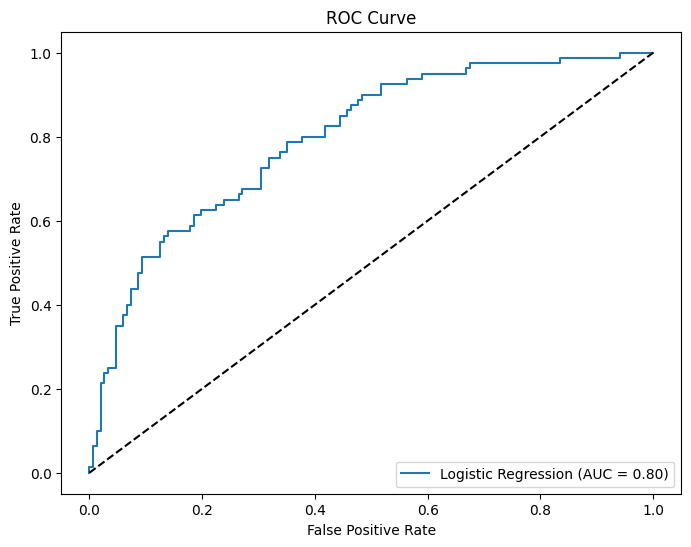

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, recall_score, precision_score, roc_curve

# 1. Evaluate model performance
# Predictions
y_pred = logreg.predict(X_test)
y_pred_prob = logreg.predict_proba(X_test)[:, 1]  # Probabilities for the ROC curve

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

# 3. Calculate Metrics
roc_auc = roc_auc_score(y_test, y_pred_prob)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"ROC AUC: {roc_auc}")
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")

# 4. Plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


Determine which features have no effect on the Outcome (Hint: you will need to use statsmodels). <p>
Exclude  features with non-statistically significant effects in the model, rebuild the model and assess how the reduced feature set affects model performance.

5 pts.

In [15]:
import statsmodels.api as sm

# Add a constant to the model (statsmodels requires an intercept)
X_with_constant = sm.add_constant(X)

# Fit the logistic regression model using statsmodels
logit_model = sm.Logit(y, X_with_constant)
result = logit_model.fit()

# Display the summary to check p-values
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.470993
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      759
Method:                           MLE   Df Model:                            8
Date:                Fri, 13 Sep 2024   Pseudo R-squ.:                  0.2718
Time:                        04:41:35   Log-Likelihood:                -361.72
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 9.652e-54
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -8.4047      0.717    -11.728      0.000      -9.809

In [17]:
# List of columns to drop (based on p-values)
# Ensure these column names match the ones in your DataFrame 'X'
columns_to_drop = ['Pregnancies', 'Glucose']  # Example: Replace with actual feature names

# Drop insignificant features
X_reduced = X.drop(columns=columns_to_drop, axis=1)

In [18]:
# Split the reduced dataset
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.30, random_state=42)

# Train the model on the reduced feature set
logreg_reduced = LogisticRegression(max_iter=1000)
logreg_reduced.fit(X_train_reduced, y_train)

# Make predictions and evaluate the new model
y_pred_reduced = logreg_reduced.predict(X_test_reduced)

# Assess performance metrics as before
accuracy_reduced = accuracy_score(y_test, y_pred_reduced)
print(f"Reduced model accuracy: {accuracy_reduced}")


Reduced model accuracy: 0.670995670995671
